In [73]:
import pandas as pd
import numpy as np
import datetime
import matplotlib.pyplot as plt
from matplotlib.dates import DayLocator, HourLocator, DateFormatter
import ast

In [ ]:
# JUST PLOTTING

In [3]:
## Base Data
df_population = pd.read_csv('Population Data.csv')
df_temperature = pd.read_csv('Temperature Data.csv')

In [4]:
# My timeseries
df = pd.read_csv('data/final/daily_temps_interpolated.csv')

In [12]:
df['datetime'] =  pd.to_datetime(df['datetime'])

In [13]:
df['datetime'].iloc[-1]

Timestamp('2021-04-20 00:00:00')

In [15]:
df['daily_temps'] = df['daily_temps'].apply(ast.literal_eval)

In [16]:
df.head(3)

,Unnamed: 0,datetime,"Henderson, Nevada","Manchester, New Hampshire","Elizabeth, New Jersey","Newark, New Jersey","Paterson, New Jersey","Jersey City, New Jersey","Albuquerque, New Mexico","Buffalo, New York",...,"Miramar, Florida","Hialeah, Florida","Coral Springs, Florida","Miami Gardens, Florida","Miami, Florida","Hollywood, Florida","Fort Lauderdale, Florida","Pompano Beach, Florida","West Palm Beach, Florida",daily_temps
0,0,2015-01-01,"(2.8042193135220215, -1.06443748149932, 7.8955...","(-2.0414172014848404, -5.2967596261279555, 0.8...","(0.7271640854069779, -2.220666115556862, 3.413...","(0.721623158787829, -2.219899178588003, 3.3984...","(0.7451333314337338, -2.249080056243332, 3.489...","(0.7012627531441941, -2.2070541621717514, 3.33...","(-3.5077581597478513, -7.620209751439084, 0.50...","(-3.254167638382994, -6.70000884781188, 1.5518...",...,"(7.261264629068813, 1.248439289328133, 13.3052...","(7.267839188054266, 1.2597305417711855, 13.306...","(7.201354121181819, 1.154658288185659, 13.2794...","(7.243316298738815, 1.2219635019938928, 13.294...","(7.258345407380921, 1.246744173453674, 13.2989...","(7.2134740706337235, 1.1762319103059715, 13.28...","(7.192921258888248, 1.143997576015988, 13.2713...","(7.1745562775268095, 1.1151363386505413, 13.26...","(7.093912585440351, 0.9870844318322061, 13.232...","(2.226442692178053, -1.988541139572663, 6.4489..."
1,1,2015-01-02,"(3.5833611965500256, -1.6416043119829218, 9.48...","(1.8123476273733083, -0.4878899169065774, 4.51...","(3.6269191023738485, 1.5579536595154981, 5.636...","(3.632688786895376, 1.576935014315009, 5.63197...","(3.5967672015962546, 1.4627489512318697, 5.664...","(3.6583143659774557, 1.659695936931595, 5.6106...","(-1.6105225388897615, -6.293151018732043, 4.47...","(-1.5874865803073686, -4.9999691405260025, 4.4...",...,"(11.946649279284825, 8.531744135775167, 15.040...","(11.964299921129687, 8.54262383433644, 15.0643...","(11.84453325605251, 8.456272588337987, 14.9129...","(11.926497144776375, 8.513341986493058, 15.018...","(11.960202600064934, 8.53553492156532, 15.0627...","(11.88196168021216, 8.478299895369968, 14.9645...","(11.846530507310883, 8.452247756304931, 14.920...","(11.814495652370088, 8.428817579069989, 14.880...","(11.66533322685168, 8.322509004465156, 14.6904...","(4.4438566903907, 0.808315671731891, 8.2566831..."
2,2,2015-01-03,"(5.313746601456074, 0.0537208688345699, 11.180...","(-1.5042004354211351, -4.641065832081684, 3.01...","(1.9401067861655703, -0.10967571559474101, 5.0...","(1.9366071662619093, -0.09493625703022997, 5.0...","(1.9531350402008636, -0.18257317909691917, 5.0...","(1.9230983187361383, -0.031069294684709044, 5....","(-1.5629823097813513, -8.72259919416442, 5.303...","(-0.6332781996894676, -5.599949953882896, 8.30...",...,"(13.882819669538627, 11.613471883752727, 17.38...","(13.898439749637344, 11.627892569102757, 17.39...","(13.776804282038322, 11.520199220572357, 17.27...","(13.857516482265105, 11.59230860429814, 17.355...","(13.889114398533502, 11.620959646627288, 17.38...","(13.808623920967795, 11.549958815046766, 17.30...","(13.772007402977584, 11.517701465200151, 17.26...","(13.73905655470369, 11.488634166796466, 17.230...","(13.589111450096825, 11.35548016535289, 17.081...","(5.5907351564346355, 1.6319473043842843, 9.855..."


Text(0, 0.5, 'Temperature (C)')

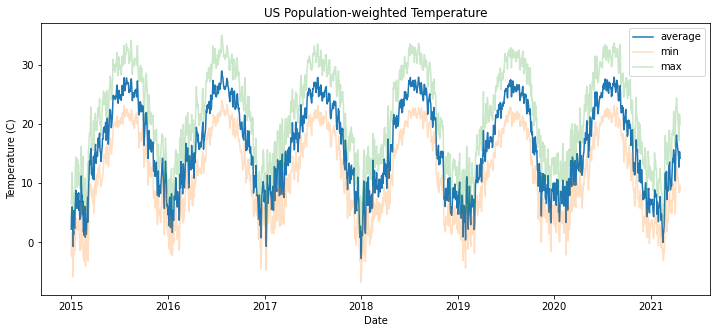

In [109]:
# 2a) Seasonal-temperature
fig, ax = plt.subplots(figsize=(12,5))
ax.plot(df['datetime'].values, [t[0] for t in df['daily_temps'].values], label='average')
ax.plot(df['datetime'].values,  [t[1] for t in df['daily_temps'].values], alpha=0.25, label='min')
ax.plot(df['datetime'].values, [t[2] for t in df['daily_temps'].values], alpha=0.25, label='max')
ax.legend()
ax.set_title("US Population-weighted Temperature")
ax.set_xlabel("Date")
ax.set_ylabel("Temperature (C)")

In [18]:
#Monthly averages
df['month'] = df.datetime.apply(lambda x: x.month)

In [20]:
df['temp_mean'] = df['daily_temps'].apply(lambda x: x[0])
df['temp_min'] = df['daily_temps'].apply(lambda x: x[1])
df['temp_max'] = df['daily_temps'].apply(lambda x: x[2])

In [21]:
df_monthly = df.groupby('month').mean()

Text(0, 0.5, 'Temperature')

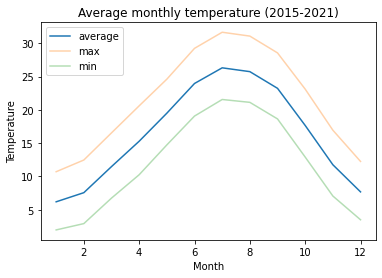

In [22]:
# 2b) Monthly
fig, ax = plt.subplots()
ax.plot(df_monthly.index.values, df_monthly.temp_mean.values, label='average')
ax.plot(df_monthly.index.values, df_monthly.temp_max.values, alpha=0.35, label='max')
ax.plot(df_monthly.index.values, df_monthly.temp_min.values, alpha=0.35, label='min')
ax.legend()
ax.set_title("Average monthly temperature (2015-2021)")
ax.set_xlabel("Month")
ax.set_ylabel("Temperature")

In [56]:
# Cities vs Stations
import folium

cities_positions = df_population[['Lat','Lon']].values
m = folium.Map(location = cities_positions[28], zoom_start=3.4)

for city_position in cities_positions:
    tooltip='YO'
    folium.Marker(
    list(city_position), popup="<i>K</i>", tooltip=tooltip
    ).add_to(m)
m



In [57]:
import infer_temperature as it

In [63]:
# Get longitude and latitude if available in nearby station
df_temperature['LonLat'] = df_temperature['name'].apply(lambda x: it.find_longlat(x, df_population))

In [62]:
df_temperature['Lat'] = df_temperature['LonLat'].apply(lambda x: x[1])
df_temperature['Lon'] = df_temperature['LonLat'].apply(lambda x: x[0])

### Stations

In [105]:
station_positions = df_temperature[['Lat','Lon']].value_counts().index.values
m = folium.Map(location = station_positions[16], zoom_start=4)
for station_position in station_positions:
    tooltip='Station'
    folium.Marker(
    list(station_position), popup="<i>K</i>", tooltip=tooltip, icon=folium.Icon(color='red', icon='info-sign')
    ).add_to(m)
m